<a href="https://colab.research.google.com/github/Harshit0722/TSF-GRIP/blob/main/Task_1_Prediction_using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

###Data Loading and Analysis

In [2]:
data = pd.read_csv('/content/Student score and sleep hours dataset.csv')

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


###Data Visualization

In [ ]:
import numpy as np

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Hours'], **{})
chart

In [8]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_9, *[[['Hours', 'Scores']]], **{})
chart

###Data splitting

In [13]:
x=data[["Hours"]]
y=data["Scores"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.7,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((7, 1), (7,), (18, 1), (18,))

###Importing and Deploying supervised learning model (Linear Regression)

In [14]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
#Training the model
model.fit(x_train,y_train)

LinearRegression()

In [16]:
#Deploying model on testing data
y_pred=model.predict(x_test)
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7


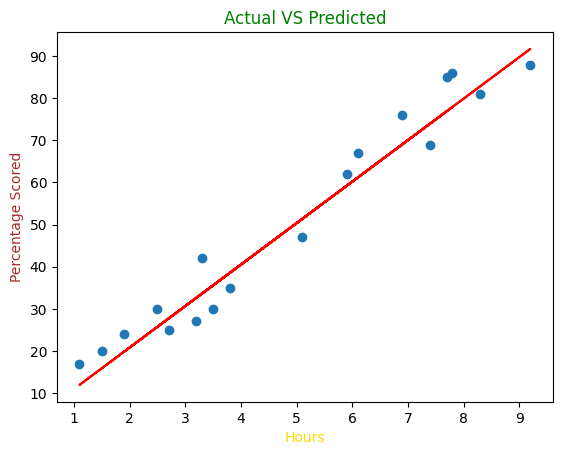

In [17]:
#Visualizing the results
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color="red")
plt.title("Actual VS Predicted",color="green")
plt.xlabel("Hours",color="gold")
plt.ylabel("Percentage Scored",color="brown")
plt.show()

###Results

In [26]:
#Predicting the required value as per the problem statement
model.predict([[9.25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92.19175707])

In [28]:
#Accuracy of Linear Regression on the given dataset in terms of Mean Absolute Error
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_pred)

5.0017874859583955

In [32]:
#Extrapolation (signifies that the model fails to predict correctly for students studying over 10 hours daily)
model.predict([[10.1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([100.56254151])

###Trying Logistic regression to overcome the problem we just discovered

In [45]:
#Importing the logistic regression model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()

In [46]:
#Training the model
model2.fit(x_train,y_train)

LogisticRegression()

In [47]:
#Deploying model on testing data
y_pred=model2.predict(x_test)
print(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9
22    3.8
17    1.9
24    7.8
23    6.9
14    1.1
1     5.1
10    7.7
13    3.3
8     8.3
6     9.2
18    6.1
4     3.5
9     2.7


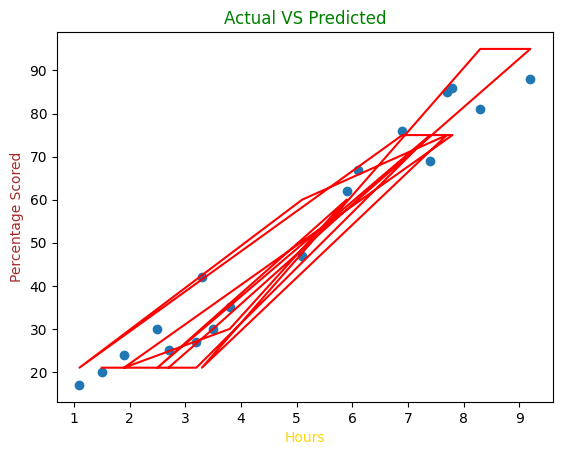

In [37]:
#Visualizing the results
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred, color="red")
plt.title("Actual VS Predicted",color="green")
plt.xlabel("Hours",color="gold")
plt.ylabel("Percentage Scored",color="brown")
plt.show()

In [61]:
model2.predict([[6.7]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([75])

In [48]:
model2.predict([[9.25]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([95])

In [54]:
model2.predict([[15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([95])

###Conclusion: Logistic regression needs a lot more data points but provides a capping value of 95/100, whereas linear regression provides better results but fails to provide a capping value of scores.